In [1]:
setwd("~/../Downloads/spoTour")
source("myTSP-helper.R")

Warning message:
"package 'TSP' was built under R version 4.2.2"
Warning message:
"package 'sf' was built under R version 4.2.1"
Linking to GEOS 3.9.1, GDAL 3.4.3, PROJ 7.2.1; sf_use_s2() is TRUE

Loading required package: sp

Loading required package: maps

Warning message:
"package 'maps' was built under R version 4.2.1"
Loading required package: gpclib

General Polygon Clipper Library for R (version 1.5-6)
	Type 'class ? gpc.poly' for help

Loading required package: rgeos

Warning message:
"package 'rgeos' was built under R version 4.2.2"
rgeos version: 0.5-9, (SVN revision 684)
 GEOS runtime version: 3.9.3-CAPI-1.14.3 
 Please note that rgeos will be retired by the end of 2023,
plan transition to sf functions using GEOS at your earliest convenience.
 GEOS using OverlayNG
 Linking to sp version: 1.5-0 
 Polygon checking: TRUE 



Attaching package: 'rgeos'


The following objects are masked from 'package:gpclib':

    append.poly, area.poly, get.bbox, get.pts, read.polyfile,
    sca

found: concorde.exe linkern.exe 


In [2]:
concorde_path()

[1] "F:\\www-since2022Nov\\concorde-linkern"

In [3]:
INGUJ.df <- read.csv(file=paste0(fName, ".csv"))
str(INGUJ.df)
tsp <- TSP(
  switch(inGPS,
    dist(INGUJ.df),
    { pdm <- pairDist(df1=INGUJ.df); as.dist(pdm) }
  ),
  labels=switch(inGPS, colnames(INGUJ.df), INGUJ.df$name)
)
write_TSPLIB(tsp, file=paste0(fName, ".tsp"), precision=0)
  # [... if x contains double values (which is normal in R) the values given in x are multiplied by 10^precision
  # before coercion to integer.]
  # Beware: (1,2), (1,3), (2,3) pair-wise "city" distances are stored!
# file.show(paste0(fName, ".tsp"))
tsp.r <- read_TSPLIB(paste0(fName, ".tsp"), precision=0)
identical(tsp, tsp.r)
tsp

'data.frame':	49 obs. of  3 variables:
 $ lat : num  13.2 21.1 22.5 22.3 23.1 ...
 $ long: num  77.7 72.7 70 70.8 72.6 ...
 $ name: chr  "Kempegowda International Airport Bengaluru, KIAL Rd, Devanahalli, Bengaluru, Karnataka 560300" "Surat Airport, Surat, Gujarat 395007" "Jamnagar Airport, F268+79J, Airport Road Civil Enclave, Govardhanpur, Jamnagar, Gujarat 361006" "Rajkot Airport, 8Q5J+HWC, Gandhigram Civil Aerodrome, Gujarat 360006" ...
Classes 'sf' and 'data.frame':	49 obs. of  2 variables:
 $ name    : chr  "Kempegowda International Airport Bengaluru, KIAL Rd, Devanahalli, Bengaluru, Karnataka 560300" "Surat Airport, Surat, Gujarat 395007" "Jamnagar Airport, F268+79J, Airport Road Civil Enclave, Govardhanpur, Jamnagar, Gujarat 361006" "Rajkot Airport, 8Q5J+HWC, Gandhigram Civil Aerodrome, Gujarat 360006" ...
 $ geometry:sfc_POINT of length 49; first list element:  'XY' num  77.7 13.2
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregat

[1] FALSE

object of class 'TSP' 
49 cities (distance 'unknown') 

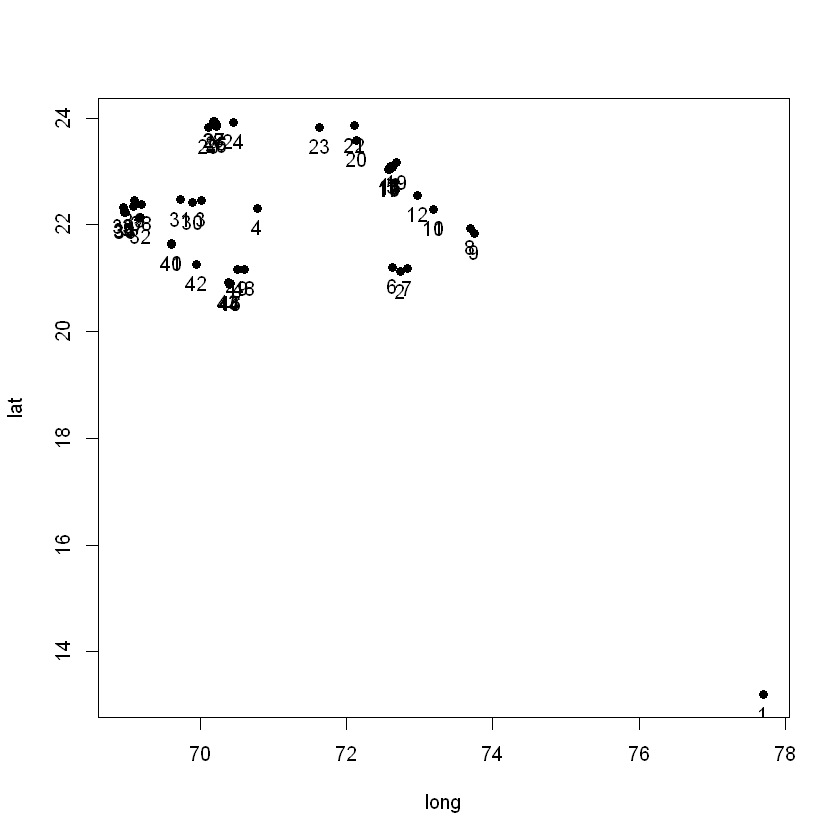

In [4]:
plot(INGUJ.df[, cLongLat], pch=19) # plot(INGUJ.df$lat, INGUJ.df$long)
  text(INGUJ.df[, cLongLat], pos=1) # , col="blue"

In [5]:
tours <- list()
tours[[1]] <- solve_TSP(tsp) # method= [default: "arbitrary insertion" algorithm with two_opt refinement.]

# reformulate_ATSP_as_TSP() # coz Concorde solver does not support ATSP.
## run concorde in verbose mode (-v) with fast cuts only (-V)
tours[[2]] <- solve_TSP(tsp, method = "concorde", control = list(clo = "-v -V"))
# tours <- lapply(methods, FUN = function(m) solve_TSP(tsp, method = m))
# names(tours) <- methods

Used control parameters by 'NA' 
clo	 =  -v -V
exe	 =  F:\www-since2022Nov\concorde-linkern/concorde
precision	 =  6
verbose	 =  TRUE
keep_files	 =  FALSE



[1] "Head, length, tail, and plot for tour 1:"
                                                Madhav hotel, Somnath Bypass Rd, circle, Somnath, Gujarat 362268 
                                                                                                              46 
Hotel Sukhsagar Somnath, Somnath Bypass Road Near Somnath Byepass Corner, Prabhas Patan, Somnath, Gujarat 362269 
                                                                                                              45 
                                         Gir Interpretation Zone, 5G66+QJQ, Safari Rd, Sandhbeda, Gujarat 362150 
                                                                                                              49 
                                                            Hotel Greenland, 5H9W+2V3, Sasan Gir, Gujarat 362135 
                                                                                                              48 
                                         

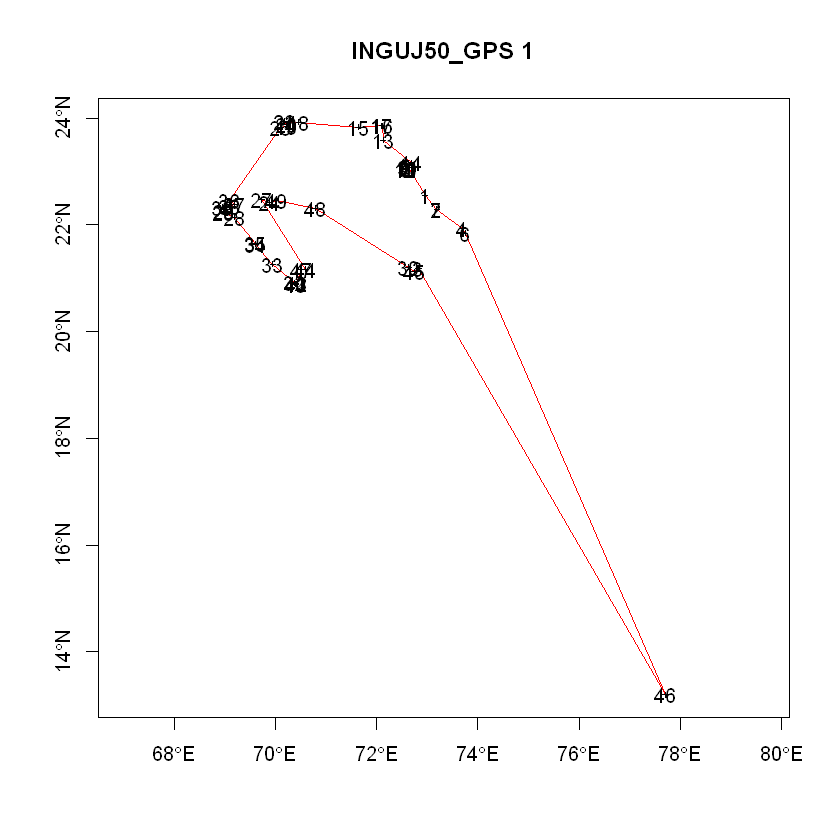

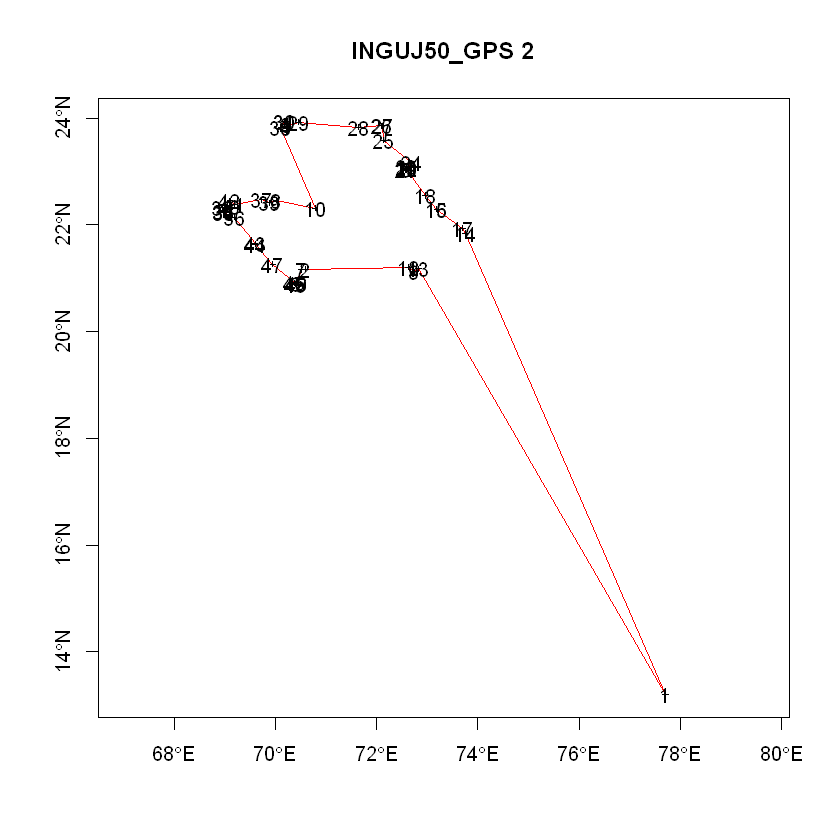

In [6]:
for(i in 1:length(tours)){
  print(paste0("Head, length, tail, and plot for tour ", i, ":"))
  tour <- tours[[i]]
  print(head(tour, n = 6))
  print(paste0(tour_length(tour), "m"))
  print(tail(tour, n = 6))
  # plot(tour) # Was: plot(tsp, tour)
  mapTour(tour, INGUJ.df, paste(fName, i), xlim=c(10,25), ylim=c(60,80))
}